### 1. Import required libraries and read the dataset. 

In [1]:
try:
    import numpy as np
    import pandas as pd 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    DeprecationWarning("ignore")
    from sklearn.preprocessing import LabelEncoder,StandardScaler
    from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score,accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression,LogisticRegression
except FileExistsError as err:
    print(err__name__)

In [2]:
def read_file(file_loca,file_name):                     #function for read file
    try:
        return pd.read_csv(file_loca+"/"+file_name)
    except:
        raise FileNotFoundError    

In [3]:
file_loca="E:/project"
file_name="app_data.csv"
df=read_file(file_loca,file_name)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


 ### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with ### different features.

In [4]:
df.head()     #top five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape  # in this dataset there are 10841 rows and 13 columns

(10841, 13)

In [6]:
df.info() #all columns datatype is object except rating columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# check the null value present in the dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# check te columns present in the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for ### model building.

In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
df.duplicated().sum()    # there are 483 values are duplicates in the dataset

483

In [11]:
df.drop_duplicates(inplace=True) #droping the duplicates values

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(10358, 13)

#### 5. Check the unique categories of the column 'Category', Is there any invalid category?  If #### yes,  drop them

In [14]:
df["Category"].unique()   #unique category of category columns


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
df=df.drop(df[df["Category"]=="1.9"].index)   #drop the invalid_category column

### 6. Check if there are missing values present in the column Rating, If any?drop them and and ### create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is ### high rest low)

In [16]:
df["Rating"].isnull().sum()  #null values present in the rating column

1465

In [17]:
df.dropna(subset=["Rating"],inplace=True)  #drop null values

In [18]:
def Rating_category(df,rating_threshold=3.5):  #function for category column
    df["Rating_category"]=["High" if rating > rating_threshold else "Low" for rating in df["Rating"]]
    return df

In [19]:
df=Rating_category(df,rating_threshold=3.5)
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High


In [20]:
df["Rating_category"].unique()   #new column rating_category

array(['High', 'Low'], dtype=object)

### 7.Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [21]:
df["Rating_category"].value_counts()

Rating_category
High    8012
Low      880
Name: count, dtype: int64

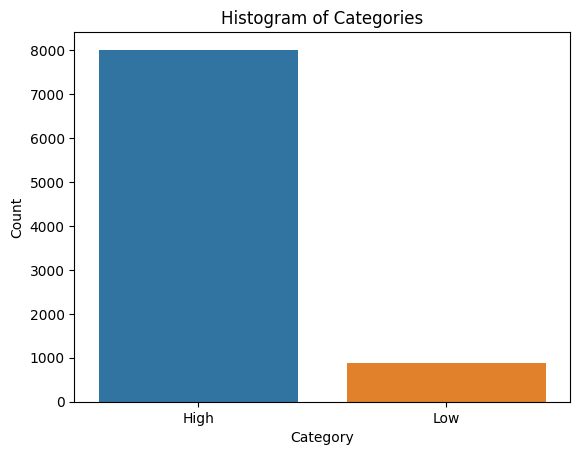

In [22]:
# Create a bar plot using Seaborn
sns.countplot(data=df, x='Rating_category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Categories')
plt.show()

high rating values are maximum than the lower rating

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the ### column and handle the outliers using a transformation approch

In [23]:
#convert into numeric datatype
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='raise')

In [24]:
#checking outliers using iqr method
q1=df["Reviews"].quantile(0.25)
q3=df["Reviews"].quantile(0.75)
IQR=q3-q1

lower_limit= q1-1.5 * IQR
upper_limit=q3+1.5 * IQR

outliers=df[(df["Reviews"] < lower_limit) | (df["Reviews"] > upper_limit)]

In [25]:
# handle the outliers using log transformation
df['Reviews'] = np.log1p(df['Reviews'])

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type.

In [26]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [27]:
df = df[df['Size'] != 'Varies with device']

In [28]:
# Replace 'M' with 1 million and 'k' with 1 thousand
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M', '')) * 1000000 if 'M' in x else float(x.replace('k', '')) * 1000)

In [29]:
df["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [30]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [31]:
#remove unwanted from character from the installs column
df["Installs"]=[x.replace("+","").replace(",","")for x in df["Installs"]]

In [32]:
#change the datatype of column
df["Installs"]=df["Installs"].astype(int)

In [33]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [34]:
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [35]:
# Removing unwanted character
df["Price"]=df["Price"].apply(lambda x:x.replace("$",""))

In [36]:
#change the datatype of the column
df["Price"]=df["Price"].astype(float)

In [37]:
df["Price"].dtype

dtype('float64')

In [38]:
df["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7424, dtype: float64

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [39]:
# Columns of the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [40]:
#drop the columns
df=df.drop(columns=["App","Rating","Genres","Last Updated","Current Ver","Android Ver"],axis=1)

In [41]:
df.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [42]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


In [43]:
# Column for object datatype
obj_column=df.select_dtypes(object).columns.to_list()
obj_column

['Category', 'Type', 'Content Rating', 'Rating_category']

In [44]:
# Function for fit value in categorical column
def le_coder(data,columns):
    fit_value={}
    for col in columns:
        le=LabelEncoder()
        fit_value.update({col:le.fit(data[col])})
    return fit_value
fit_value=le_coder(df,obj_column)        
     

In [45]:
print(fit_value)

{'Category': LabelEncoder(), 'Type': LabelEncoder(), 'Content Rating': LabelEncoder(), 'Rating_category': LabelEncoder()}


In [47]:
#function for transform the value of categorical column
def le_transform(data,fit_value):
    for col,encoder in fit_value.items():
        data[col]=encoder.transform(data[col])
    return data
le_transform(df,fit_value)        

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.075174,19000000.0,10000,0,0.0,1,0
1,0,6.875232,14000000.0,500000,0,0.0,1,0
2,0,11.379520,8700000.0,5000000,0,0.0,1,0
3,0,12.281389,25000000.0,50000000,0,0.0,4,0
4,0,6.875232,2800000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,3.806662,619000.0,1000,0,0.0,1,0
10834,11,2.079442,2600000.0,500,0,0.0,1,0
10836,11,3.663562,53000000.0,5000,0,0.0,1,0
10837,11,1.609438,3600000.0,100,0,0.0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [49]:
#function for separate the target variable
def sep_target(data,target):
    y=data.pop(target)
    return data,y 
df,target=sep_target(df,"Rating_category")    

### 15. Split the dataset into train and test.

In [53]:
#split the data into train test
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [55]:
train.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
9375,28,10.484222,55000000.0,5000000,0,0.0,1
3025,28,10.498360,25000000.0,1000000,0,0.0,1
7549,23,8.291547,1100000.0,100000,0,0.0,1


In [56]:
test.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1867,14,12.321698,81000000.0,5000000,0,0.0,4
4414,14,4.394449,7600000.0,10000,0,0.0,1
116,2,4.317488,2900000.0,10000,0,0.0,1


## 16. Standardize the data, so that the values are within a particular range.

In [58]:
#standardize the data using standard scaler
def standard_data(train,test):
    scaler=StandardScaler()
    scaler.fit(train)
    scaler.fit(test)
    train=scaler.transform(train)
    test=scaler.transform(test)
    return train,test

In [59]:
standard_data(train,test)

(array([[ 1.3908609 ,  0.80630419,  1.39990785, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        [ 1.3908609 ,  0.81011181,  0.10498685, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        [ 0.78123031,  0.21579864, -0.92663355, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        ...,
        [-0.6818831 ,  0.59633181, -0.41298155, ..., -0.29380335,
         -0.06098277,  2.52829097],
        [-0.07225251,  1.46847801,  0.49346315, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        [ 1.02508254, -1.49313373,  0.88193945, ..., -0.29380335,
         -0.06098277, -0.4578003 ]]),
 array([[-0.31610475,  1.30115172,  2.52217272, ..., -0.29380335,
         -0.06098277,  2.52829097],
        [-0.31610475, -0.83372192, -0.64606733, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        [-1.77921816, -0.85444817, -0.84893829, ..., -0.29380335,
         -0.06098277, -0.4578003 ],
        ...,
        [ 1.51278702,  0.40774898, -0.80577426, ..., -